# Interpolação Spline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def interpolacao_spline():
  # Dados com leituras faltantes (t=20 e t=40 ausentes)

  tempo = np.array([0,10,30,50])
  temperatura = np.array([45,47,49,53])

  # Criação do Spline cúbico natural

  spline = CubicSpline(tempo, temperatura, bc_type='natural')

  # Pontos interpolados (Para visualização suave)

  tempo_interp = np.linspace(0,50,100)
  temperatura_interp = spline(tempo_interp)

In [ ]:
# Lagrange e newton para dia 10/11

#Lagrange


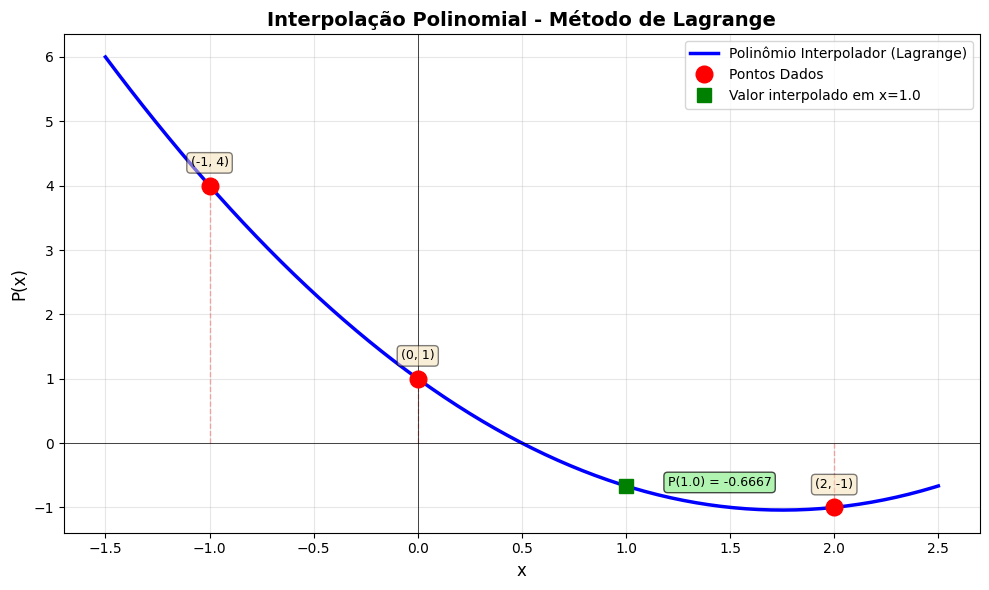

Interpolação de Lagrange
Pontos dados:
  x[0] =  -1.00  →  y[0] =   4.00
  x[1] =   0.00  →  y[1] =   1.00
  x[2] =   2.00  →  y[2] =  -1.00
------------------------------------------------------------
Grau do polinômio: 2
Valor interpolado em x = 1.0: P(1.0) = -0.666667


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def interpolacao_lagrange(x, vet, dep):
    n = len(vet)
    q = 0

    for i in range(n):
        p = 1
        for j in range(n):
            if j != i:
                num = x - vet[j]
                den = vet[i] - vet[j]
                p *= num / den
        q += p * dep[i]
    return q

# Pontos dados
vet = [-1, 0, 2]
dep = [4, 1, -1]

# Criar pontos para plotar a curva interpolada
x_plot = np.linspace(min(vet) - 0.5, max(vet) + 0.5, 200)
y_plot = [interpolacao_lagrange(x, vet, dep) for x in x_plot]

# Calcular alguns valores específicos
x_teste = 1.0
y_teste = interpolacao_lagrange(x_teste, vet, dep)

# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Curva interpolada
ax.plot(x_plot, y_plot, 'b-', linewidth=2.5, label='Polinômio Interpolador (Lagrange)')

# Pontos dados
ax.plot(vet, dep, 'ro', markersize=12, label='Pontos Dados', zorder=5)

# Ponto interpolado de exemplo
ax.plot(x_teste, y_teste, 'gs', markersize=10, label=f'Valor interpolado em x={x_teste}', zorder=5)

# Linhas verticais dos pontos dados
for i in range(len(vet)):
    ax.plot([vet[i], vet[i]], [0, dep[i]], 'r--', alpha=0.3, linewidth=1)
    ax.text(vet[i], dep[i] + 0.3, f'({vet[i]}, {dep[i]})',
            ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Anotação do valor interpolado
texto_interpolado = f'P({x_teste}) = {y_teste:.4f}'
ax.text(x_teste + 0.2, y_teste, texto_interpolado, fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_title('Interpolação Polinomial - Método de Lagrange', fontsize=14, fontweight='bold')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('P(x)', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Informações
print("="*60)
print("Interpolação de Lagrange")
print("="*60)
print(f"Pontos dados:")
for i in range(len(vet)):
    print(f"  x[{i}] = {vet[i]:6.2f}  →  y[{i}] = {dep[i]:6.2f}")
print("-"*60)
print(f"Grau do polinômio: {len(vet) - 1}")
print(f"Valor interpolado em x = {x_teste}: P({x_teste}) = {y_teste:.6f}")
print("="*60)

# Newton


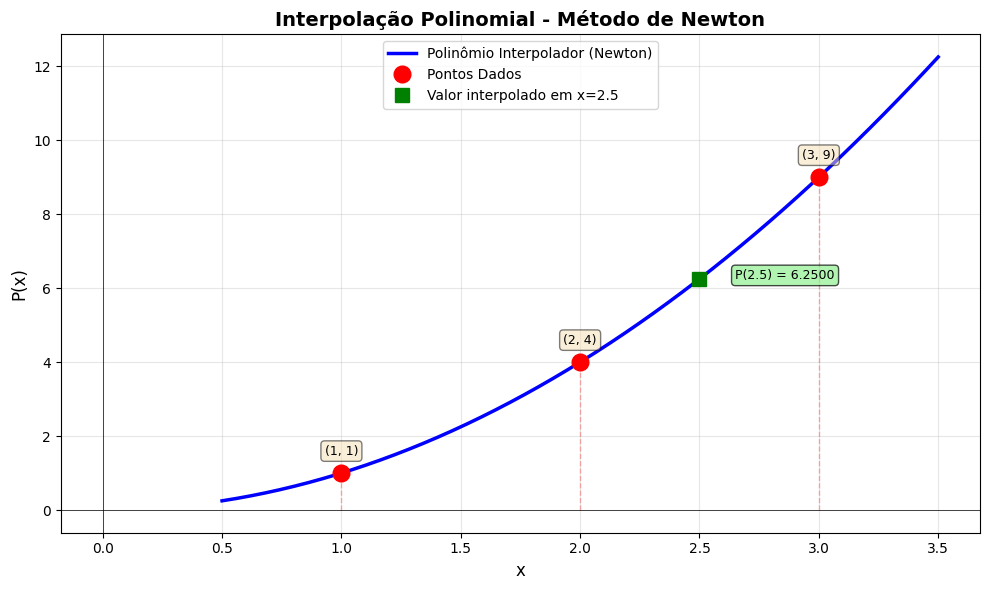

Interpolação de Newton
Pontos dados:
  x[0] =   1.00  →  y[0] =   1.00
  x[1] =   2.00  →  y[1] =   4.00
  x[2] =   3.00  →  y[2] =   9.00
------------------------------------------------------------
Tabela de Diferenças Divididas:
      1.0000      3.0000      1.0000  
      4.0000      5.0000  
      9.0000  
------------------------------------------------------------
Grau do polinômio: 2
Valor interpolado em x = 2.5: P(2.5) = 6.250000


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def interpolacao_newton(num, x, y):
    qt_elementos = len(x)
    coeficiente = [i for i in y]

    # Tabela de diferença
    for i in range(1, qt_elementos):
        for j in range(qt_elementos - 1, i - 1, -1):
            coeficiente[j] = (coeficiente[j] - coeficiente[j - 1]) / (x[j] - x[j - i])

    # Interpolação
    resultado = coeficiente[-1]
    for i in range(qt_elementos - 2, -1, -1):
        resultado = resultado * (num - x[i]) + coeficiente[i]
    return resultado

# Pontos dados
x = [1, 2, 3]
y = [1, 4, 9]

# Criar pontos para plotar a curva interpolada
x_plot = np.linspace(min(x) - 0.5, max(x) + 0.5, 200)
y_plot = [interpolacao_newton(xi, x, y) for xi in x_plot]

# Calcular alguns valores específicos
x_teste = 2.5
y_teste = interpolacao_newton(x_teste, x, y)

# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Curva interpolada
ax.plot(x_plot, y_plot, 'b-', linewidth=2.5, label='Polinômio Interpolador (Newton)')

# Pontos dados
ax.plot(x, y, 'ro', markersize=12, label='Pontos Dados', zorder=5)

# Ponto interpolado de exemplo
ax.plot(x_teste, y_teste, 'gs', markersize=10, label=f'Valor interpolado em x={x_teste}', zorder=5)

# Linhas verticais dos pontos dados
for i in range(len(x)):
    ax.plot([x[i], x[i]], [0, y[i]], 'r--', alpha=0.3, linewidth=1)
    ax.text(x[i], y[i] + 0.5, f'({x[i]}, {y[i]})',
            ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Anotação do valor interpolado
texto_interpolado = f'P({x_teste}) = {y_teste:.4f}'
ax.text(x_teste + 0.15, y_teste, texto_interpolado, fontsize=9,
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.set_title('Interpolação Polinomial - Método de Newton', fontsize=14, fontweight='bold')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('P(x)', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular a tabela de diferenças divididas
def calcular_tabela_diferencas(x, y):
    n = len(x)
    tabela = [[0 for _ in range(n)] for _ in range(n)]

    # Primeira coluna
    for i in range(n):
        tabela[i][0] = y[i]

    # Demais colunas
    for j in range(1, n):
        for i in range(n - j):
            tabela[i][j] = (tabela[i + 1][j - 1] - tabela[i][j - 1]) / (x[i + j] - x[i])

    return tabela

tabela = calcular_tabela_diferencas(x, y)

# Informações
print("="*60)
print("Interpolação de Newton")
print("="*60)
print(f"Pontos dados:")
for i in range(len(x)):
    print(f"  x[{i}] = {x[i]:6.2f}  →  y[{i}] = {y[i]:6.2f}")
print("-"*60)
print("Tabela de Diferenças Divididas:")
for i in range(len(x)):
    linha = "  "
    for j in range(len(x) - i):
        linha += f"{tabela[i][j]:10.4f}  "
    print(linha)
print("-"*60)
print(f"Grau do polinômio: {len(x) - 1}")
print(f"Valor interpolado em x = {x_teste}: P({x_teste}) = {y_teste:.6f}")
print("="*60)

# Somas de Riemann

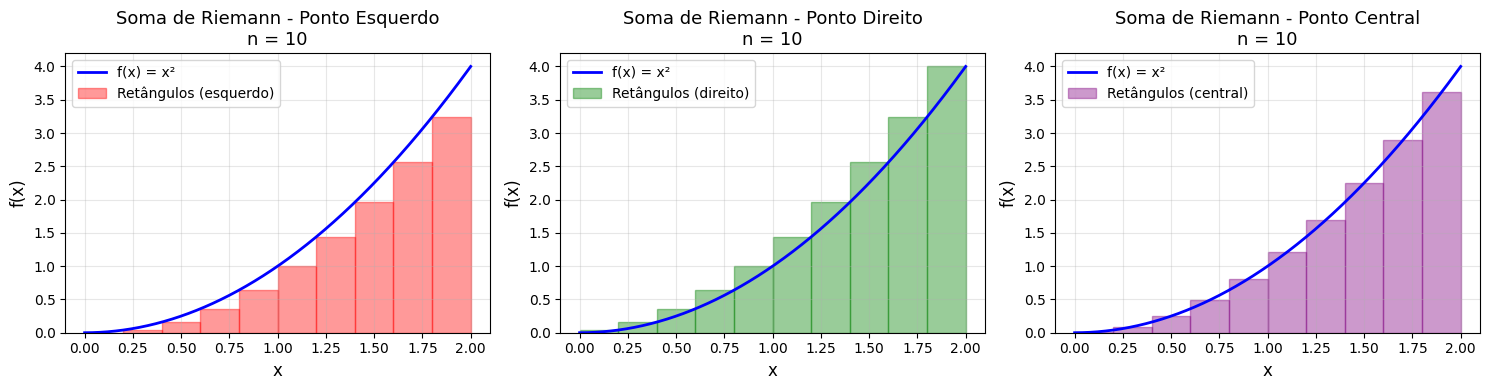

Comparação das Somas de Riemann
Função: f(x) = x²  |  Intervalo: [0, 2]  |  n = 10
Integral real:        2.6666666667
Soma (esquerdo):      2.2800000000  |  Erro: 0.3866666667
Soma (direito):       3.0800000000  |  Erro: 0.4133333333
Soma (central):       2.6600000000  |  Erro: 0.0066666667


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def soma_esquerdo(f, a, b, n, Dx):
    soma = 0.0
    for i in range(n):
        x = a + i * Dx
        soma += f(x)
    return soma * Dx

def soma_direito(f, a, b, n, Dx):
    soma = 0.0
    for i in range(1, n+1):
        x = a + i * Dx
        soma += f(x)
    return soma * Dx

def soma_central(f, a, b, n, Dx):
    soma = 0.0
    for i in range(n):
        x = a + (i + 0.5) * Dx
        soma += f(x)
    return soma * Dx

# Função de exemplo: f(x) = x²
def f(x):
    return x**2

# Parâmetros
a, b = 0, 2
n_visual = 10
Dx_visual = (b - a) / n_visual

# Curva da função
x_plot = np.linspace(a, b, 1000)
y_plot = f(x_plot)

# Criar 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1: Soma Esquerdo
ax1.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = x²')
for i in range(n_visual):
    x_left = a + i * Dx_visual
    ax1.bar(x_left, f(x_left), width=Dx_visual, alpha=0.4,
            edgecolor='red', color='red', align='edge',
            label='Retângulos (esquerdo)' if i == 0 else '')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title(f'Soma de Riemann - Ponto Esquerdo\nn = {n_visual}', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Soma Direito
ax2.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = x²')
for i in range(n_visual):
    x_right = a + (i + 1) * Dx_visual
    ax2.bar(a + i * Dx_visual, f(x_right), width=Dx_visual, alpha=0.4,
            edgecolor='green', color='green', align='edge',
            label='Retângulos (direito)' if i == 0 else '')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title(f'Soma de Riemann - Ponto Direito\nn = {n_visual}', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Soma Central
ax3.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = x²')
for i in range(n_visual):
    x_central = a + (i + 0.5) * Dx_visual
    ax3.bar(a + i * Dx_visual, f(x_central), width=Dx_visual, alpha=0.4,
            edgecolor='purple', color='purple', align='edge',
            label='Retângulos (central)' if i == 0 else '')
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('f(x)', fontsize=12)
ax3.set_title(f'Soma de Riemann - Ponto Central\nn = {n_visual}', fontsize=13)
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular e comparar os valores
valor_esquerdo = soma_esquerdo(f, a, b, n_visual, Dx_visual)
valor_direito = soma_direito(f, a, b, n_visual, Dx_visual)
valor_central = soma_central(f, a, b, n_visual, Dx_visual)
valor_real = (b**3 - a**3) / 3  # Integral real de x²

print("="*60)
print(f"Comparação das Somas de Riemann")
print(f"Função: f(x) = x²  |  Intervalo: [{a}, {b}]  |  n = {n_visual}")
print("="*60)
print(f"Integral real:        {valor_real:.10f}")
print(f"Soma (esquerdo):      {valor_esquerdo:.10f}  |  Erro: {abs(valor_real - valor_esquerdo):.10f}")
print(f"Soma (direito):       {valor_direito:.10f}  |  Erro: {abs(valor_real - valor_direito):.10f}")
print(f"Soma (central):       {valor_central:.10f}  |  Erro: {abs(valor_real - valor_central):.10f}")
print("="*60)

# Trapézios

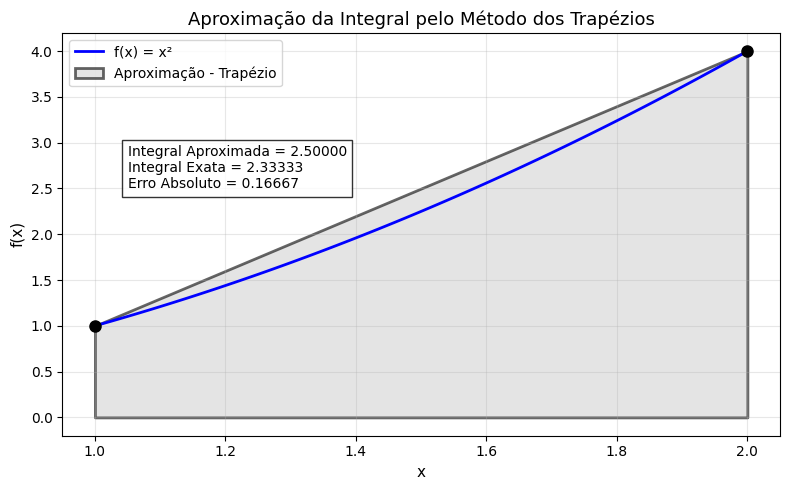

Método dos Trapézios Simples
Função: f(x) = x²
Intervalo: [1, 2]
Integral aproximada: 2.5000000000
Integral exata:      2.3333333333
Erro absoluto:       0.1666666667


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def trapezio_simples(f, a, b):
    Dx = (b - a) / 2
    return Dx * (f(a) + f(b))

# Definir a função
def funcao(x):
    return x**2

# Parâmetros
a = 1
b = 2

# Cálculos
integ = (b**3 / 3) - (a**3 / 3)  # Integral exata
trap = trapezio_simples(funcao, a, b)  # Aproximação
err_abs = abs(trap - integ)  # Erro absoluto

# Preparar dados para o gráfico
x_vals = np.array([a, b])
y_vals = np.array([funcao(a), funcao(b)])

# Gráfico
x_plot = np.linspace(a, b, 100)
y_plot = funcao(x_plot)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x_plot, y_plot, 'b', linewidth=2, label='f(x) = x²')
ax.fill_between(x_vals, y_vals, color='lightgray', edgecolor='black',
                 linewidth=2, label='Aproximação - Trapézio', alpha=0.6)
ax.plot(x_vals, y_vals, 'ko', markersize=8)  # pontos nos nós

# Anotações no gráfico
texto_resultado = (
    f"Integral Aproximada = {trap:.5f}\n"
    f"Integral Exata = {integ:.5f}\n"
    f"Erro Absoluto = {err_abs:.5f}"
)
ax.text(1.05, 2.5, texto_resultado, fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

ax.set_title("Aproximação da Integral pelo Método dos Trapézios", fontsize=13)
ax.set_xlabel("x", fontsize=11)
ax.set_ylabel("f(x)", fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*50)
print("Método dos Trapézios Simples")
print("="*50)
print(f"Função: f(x) = x²")
print(f"Intervalo: [{a}, {b}]")
print(f"Integral aproximada: {trap:.10f}")
print(f"Integral exata:      {integ:.10f}")
print(f"Erro absoluto:       {err_abs:.10f}")
print("="*50)

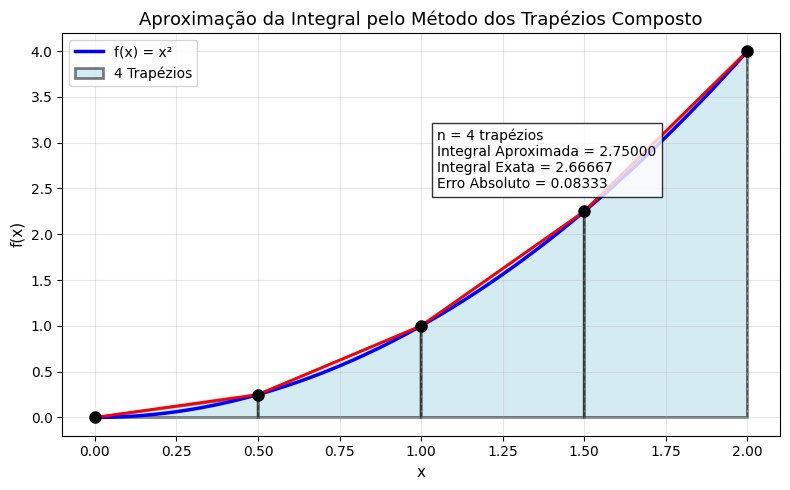

Método dos Trapézios Composto
Função: f(x) = x²
Intervalo: [0, 2]
Número de trapézios: 4
Tamanho do passo (h): 0.50000
Integral aproximada: 2.7500000000
Integral exata:      2.6666666667
Erro absoluto:       0.0833333333


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def n_trapezio(f, a, b, n):
    soma = f(a) + f(b)
    h = (b - a) / n
    for i in range(1, n):
        Xi = a + i * h
        soma += 2 * f(Xi)
    soma_total = soma * (h / 2)
    return soma_total

# Definir a função
def funcao(x):
    return x**2

# Parâmetros
a = 0
b = 2
n = 4  # Número de subdivisões

# Cálculos
integ = (b**3 / 3) - (a**3 / 3)  # Integral exata
trap = n_trapezio(funcao, a, b, n)  # Aproximação
err_abs = abs(trap - integ)  # Erro absoluto

# Preparar dados para o gráfico
h = (b - a) / n
x_vals = np.array([a + i * h for i in range(n + 1)])
y_vals = np.array([funcao(x) for x in x_vals])

# Gráfico
x_plot = np.linspace(a, b, 100)
y_plot = funcao(x_plot)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x_plot, y_plot, 'b', linewidth=2.5, label='f(x) = x²')

# Desenhar cada trapézio individualmente
for i in range(n):
    x_trap = [x_vals[i], x_vals[i+1], x_vals[i+1], x_vals[i]]
    y_trap = [0, 0, y_vals[i+1], y_vals[i]]
    ax.fill(x_trap, y_trap, color='lightblue', edgecolor='black',
            linewidth=2, alpha=0.5)

# Desenhar as linhas do topo de cada trapézio
for i in range(n):
    ax.plot([x_vals[i], x_vals[i+1]], [y_vals[i], y_vals[i+1]],
            'r-', linewidth=2)

# Pontos nos nós
ax.plot(x_vals, y_vals, 'ko', markersize=8, zorder=5)

# Linhas verticais nos nós
for x in x_vals:
    ax.plot([x, x], [0, funcao(x)], 'k--', alpha=0.4, linewidth=1)

# Anotações no gráfico
texto_resultado = (
    f"n = {n} trapézios\n"
    f"Integral Aproximada = {trap:.5f}\n"
    f"Integral Exata = {integ:.5f}\n"
    f"Erro Absoluto = {err_abs:.5f}"
)
ax.text(1.05, 2.5, texto_resultado, fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

ax.set_title("Aproximação da Integral pelo Método dos Trapézios Composto", fontsize=13)
ax.set_xlabel("x", fontsize=11)
ax.set_ylabel("f(x)", fontsize=11)
ax.legend(['f(x) = x²', f'{n} Trapézios'])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*50)
print("Método dos Trapézios Composto")
print("="*50)
print(f"Função: f(x) = x²")
print(f"Intervalo: [{a}, {b}]")
print(f"Número de trapézios: {n}")
print(f"Tamanho do passo (h): {h:.5f}")
print(f"Integral aproximada: {trap:.10f}")
print(f"Integral exata:      {integ:.10f}")
print(f"Erro absoluto:       {err_abs:.10f}")
print("="*50)